In [70]:
import csv
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [7]:
File = pd.read_csv('text.csv')

In [11]:
# File

In [10]:
# File['Text']

In [57]:
File["Compound"] = ""
File["Postivity"] = ""
File["Negativity"] = ""
File["Neutral"] = ""
File["Polarity"] = ""
File["Subjectivity"] = ""

del File['Polairty']

In [58]:
File.head()

,ICO,Tweet Count,Text,Compound,Postivity,Negativity,Neutral,Subjectivity,Polarity
0,Filecoin,1,I like the filecoin,,,,,,
1,Filecoin,2,I hate the people,,,,,,
2,Filecoin,3,they are fake,,,,,,
3,Filecoin,4,I love the icecream,,,,,,
4,Bancor,1,I am mad at myself,,,,,,


In [64]:
for index,row in File.iterrows():
#     print(row)
    sentence = row['Text']
    print(sentence)
    blob = TextBlob(sentence)
    print("Polarity: ", blob.sentiment.polarity, "Subjectivity: ",blob.sentiment.subjectivity)
    compound = analyzer.polarity_scores(row['Text'])["compound"]
    pos = analyzer.polarity_scores(row['Text'])["pos"]
    neu = analyzer.polarity_scores(row['Text'])["neu"]
    neg = analyzer.polarity_scores(row['Text'])["neg"]
    print("Compound: ", compound, "Positivity: ", pos, "Neutral: ", neu, "Negative: ",neg)
    
    
    
    
    File.set_value(index, "Polarity", blob.sentiment.polarity)
    File.set_value(index, "Subjectivity", blob.sentiment.subjectivity)
    File.set_value(index, "Compound", compound)
    File.set_value(index, "Postivity", pos)
    File.set_value(index, "Negativity", neu)
    File.set_value(index, "Neutral", neg)


I like the filecoin
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.3612 Positivity:  0.556 Neutral:  0.444 Negative:  0.0
I hate the people
Polarity:  -0.8 Subjectivity:  0.9
Compound:  -0.5719 Positivity:  0.0 Neutral:  0.351 Negative:  0.649
they are fake
Polarity:  -0.5 Subjectivity:  1.0
Compound:  -0.4767 Positivity:  0.0 Neutral:  0.392 Negative:  0.608
I love the icecream
Polarity:  0.5 Subjectivity:  0.6
Compound:  0.6369 Positivity:  0.677 Neutral:  0.323 Negative:  0.0
I am mad at myself
Polarity:  -0.625 Subjectivity:  1.0
Compound:  -0.4939 Positivity:  0.0 Neutral:  0.484 Negative:  0.516
I am busy and got so much to work
Polarity:  0.15000000000000002 Subjectivity:  0.25
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
I am not stupid
Polarity:  0.39999999999999997 Subjectivity:  1.0
Compound:  0.4168 Positivity:  0.581 Neutral:  0.419 Negative:  0.0
are you crazy?
Polarity:  -0.6 Subjectivity:  0.9
Compound:  -0.34 Positivity:  0.0 Neutral:  0.455 Negative:  

In [65]:
File

,ICO,Tweet Count,Text,Compound,Postivity,Negativity,Neutral,Subjectivity,Polarity
0,Filecoin,1,I like the filecoin,0.3612,0.556,0.444,0,0,0
1,Filecoin,2,I hate the people,-0.5719,0,0.351,0.649,0.9,-0.8
2,Filecoin,3,they are fake,-0.4767,0,0.392,0.608,1,-0.5
3,Filecoin,4,I love the icecream,0.6369,0.677,0.323,0,0.6,0.5
4,Bancor,1,I am mad at myself,-0.4939,0,0.484,0.516,1,-0.625
5,Bancor,2,I am busy and got so much to work,0,0,1,0,0.25,0.15
6,Bancor,3,I am not stupid,0.4168,0.581,0.419,0,1,0.4
7,Bancor,4,are you crazy?,-0.34,0,0.455,0.545,0.9,-0.6


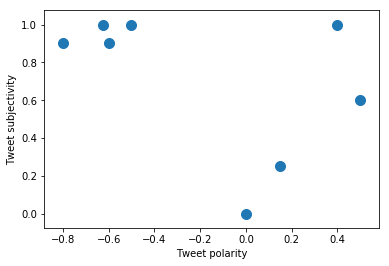

In [75]:
plt.scatter(File['Polarity'], File['Subjectivity'], s=100)
plt.xlabel('Tweet polarity')
plt.ylabel('Tweet subjectivity')
# plt.xlim(-1.1, 1.1)
# plt.ylim(-0.1, 1.1)
plt.show()

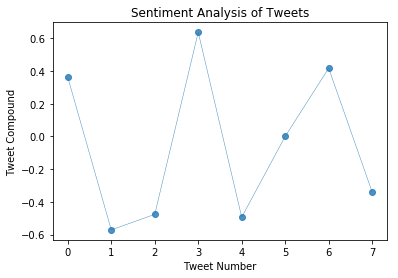

In [78]:
# Create plot
plt.plot(np.arange(len(File["Compound"])),
         File["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets")
plt.ylabel("Tweet Compound")
plt.xlabel("Tweet Number")
plt.show()

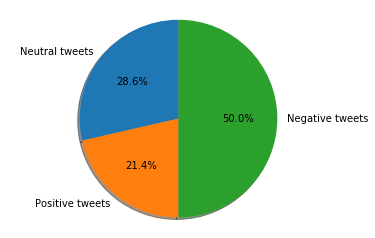

In [83]:
positive_polarity = [p for p in File['Postivity'] if p>0.5]
negative_polarity = [n for n in File['Negativity'] if n<0.5]
neutral_polarity = [r for r in File['Neutral'] if r==0]


total_size = len(positive_polarity) + len(negative_polarity) + len(neutral_polarity)
n_size = len(negative_polarity)/total_size
p_size = len(positive_polarity)/total_size
r_size = len(neutral_polarity)/total_size


labels = ['Neutral tweets', 'Positive tweets', 'Negative tweets']
sizes = [r_size, p_size, n_size]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()